# E-tivity 3: Clustering and Manifold Learning

## Name: Martin Power
## ID      : 9939245

Use this notebook to complete Tasks 1 and 2 in E-tivity3.

### Import Python Modules

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import manifold
from sklearn import cluster
from sklearn import preprocessing
from sklearn.preprocessing import power_transform

# Table of Contents

#### Task 1
* [Task 1 Code](#task1)
* [Task 1 - Feature Scaling](#task1_scale)
* [Task 1 - MDS Visualisation](#task1_mds)
* [Task 1 - t-SNE Visualisation](#task1_tsne)
* [Task 1 - Cluster Description](#task1_desc)
* [Task 1 - Cluster Characteristics](#task1_cha)

#### Task 2
* [Task 2 Code](#task2)
* [Task 2 -  Sum of Squared Distances Plot](#task2_plot)
* [Task 2 -  Elbow Method to Find Best k](#task2_elbow)
* [Task 2 -  Silhouette Coefficient Method to Find Best k](#task2_sc)
* [Task 2 -  Additional Clustering Algorithm](#task2_add_algo)
* [Task 2 -  Additional Manifold Learning Technique](#task2_add_man)
* [Task 2 -  Visual Comparison of Clusterings](#task2_vcomp)
* [Task 2 -  Difference Between K-Means And Second Algorithm Discussion](#task2_diff)

<a id='task1'></a>

# Task 1 (CS5062)

In [2]:
df = pd.read_csv("./loans_dataset_et3.csv")

print("Number of Samples  in Dataset:\t",df.shape[0])
print("Number of Features in Dataset:\t",df.shape[1])

Number of Samples  in Dataset:	 332
Number of Features in Dataset:	 5


In [3]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,2483,2466.0,90,180,0
1,4917,0.0,130,360,0
2,4106,0.0,40,180,1
3,3859,3300.0,142,180,1
4,6417,0.0,157,180,1


<a id='task1_scale'></a>

In [4]:
df.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
327,5417,4196.0,267,360,1
328,16666,0.0,275,360,1
329,10750,0.0,312,360,1
330,5955,5625.0,315,360,1
331,6133,3906.0,324,360,1


In [5]:
# Print statistical summary for all attributes
df.describe(include='all')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,332.000000,332.000000,332.000000,332.000000,332.000000
mean,5201.093373,1495.508795,140.882530,341.710843,0.978916
std,4584.815491,1982.742932,75.544237,61.651497,0.143882
min,645.000000,0.000000,17.000000,60.000000,0.000000
25%,2912.750000,0.000000,100.000000,360.000000,1.000000
50%,3858.500000,1211.500000,128.000000,360.000000,1.000000
75%,5818.250000,2250.000000,162.000000,360.000000,1.000000
max,39999.000000,20000.000000,600.000000,480.000000,1.000000


In [6]:
# Quick Check to Ensure no missing data
print(df.isnull().any())

ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
dtype: bool


In [14]:
def plot_hist_with_box(feature):
    # From https://python-graph-gallery.com/24-histogram-with-a-boxplot-on-top-seaborn/
    # Cut the window in 2 parts
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    # Add a graph in each part
    #sns.boxplot(df[feature], ax=ax_box)
    #sns.distplot(df[feature], ax=ax_hist)
    sns.boxplot(feature, ax=ax_box)
    sns.distplot(feature, ax=ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    plt.show()
    return

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


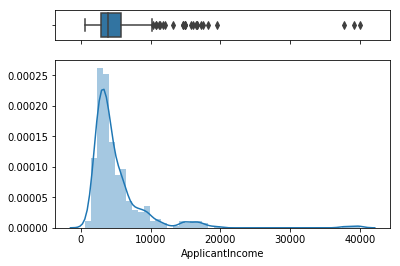

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


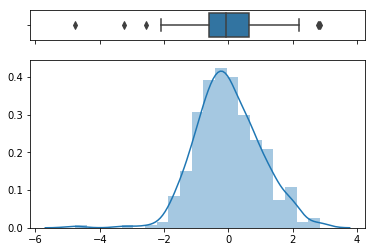

In [23]:
plot_hist_with_box(df['ApplicantIncome'])
plot_hist_with_box(power_transform(np.expand_dims(df['ApplicantIncome'], axis=1), method='box-cox'))

#df['bc_age'] = power_transform(np.expand_dims(df['age'], axis=1), method='box-cox')

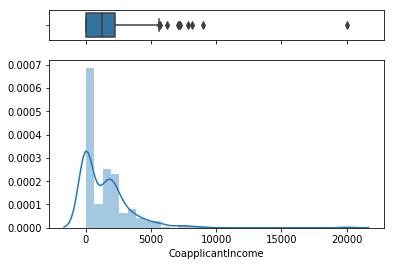

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


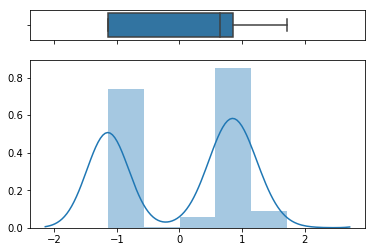

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


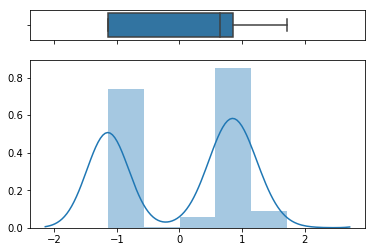

In [27]:
plot_hist_with_box(df['CoapplicantIncome'])
plot_hist_with_box(power_transform(np.expand_dims(df['CoapplicantIncome'], axis=1), method='yeo-johnson'))
plot_hist_with_box(power_transform(np.expand_dims(df['CoapplicantIncome']+1, axis=1), method='box-cox'))

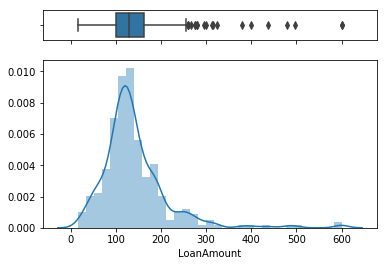

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


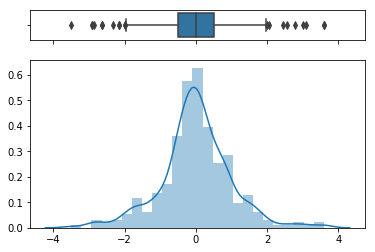

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


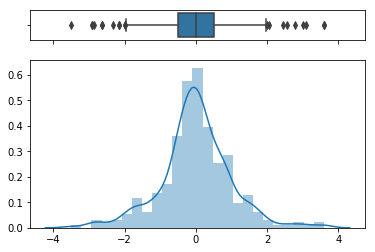

In [28]:
plot_hist_with_box(df['LoanAmount'])
plot_hist_with_box(power_transform(np.expand_dims(df['LoanAmount'], axis=1), method='yeo-johnson'))
plot_hist_with_box(power_transform(np.expand_dims(df['LoanAmount']+1, axis=1), method='box-cox'))

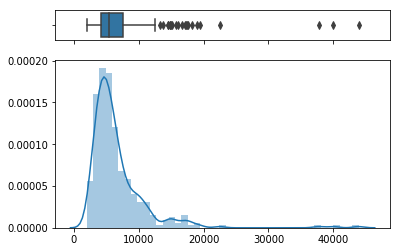

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


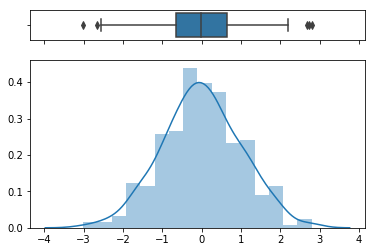

In [30]:
plot_hist_with_box(df['ApplicantIncome']+df['CoapplicantIncome'])
plot_hist_with_box(power_transform(np.expand_dims(df['ApplicantIncome']+df['CoapplicantIncome'], axis=1), method='box-cox'))

## Task 1 - Feature Scaling

In [8]:
X_raw = df.drop('Credit_History', axis=1)
y     = df['Credit_History']

In [9]:
X_raw.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,2483,2466.0,90,180
1,4917,0.0,130,360
2,4106,0.0,40,180
3,3859,3300.0,142,180
4,6417,0.0,157,180


<a id='task1_mds'></a>

## Task 1 - MDS Visualisation

<a id='task1_tsne'></a>

## Task 1 - t-SNE Visualisation

<a id='task1_desc'></a>

## Task 1 - Cluster Description

<a id='task1_char'></a>

## Task 1 - Cluster Characteristics

<a id='task2'></a>

# Task 2 (CS5062)

<a id='task2_plot'></a>

## Task 2 - Sum of Squared Distances Plot

<a id='task2_elbow'></a>

## Task 2 - Elbow Method to Find Best k

<a id='task2_sc'></a>

## Task 2 - Silhouette Coefficient Method to Find Best k

<a id='task2_add_algo'></a>

## Task 2 - Additional Clustering Algorithm

<a id='task2_add_man'></a>

## Task 2 - Additional Manifold Learning Technique

<a id='task2_vcomp'></a>

## Task 2 - Visual Comparison of Clusterings

<a id='task2_diff'></a>

## Task 2 - Difference Between K-Means And Second Algorithm Discussion